In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from kneed import KneeLocator
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
from kneed import KneeLocator
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.utils import shuffle  # Import shuffle function
from kneed import KneeLocator
from PIL import Image
import cv2
import pandas as pd

In [2]:
# 1) Transforme a imagem em um dataset

imagem = Image.open("halteres.jpg")
imagem_array = np.array(imagem)
print("Shape da imagem array:", imagem_array.shape)

Shape da imagem array: (225, 300, 3)


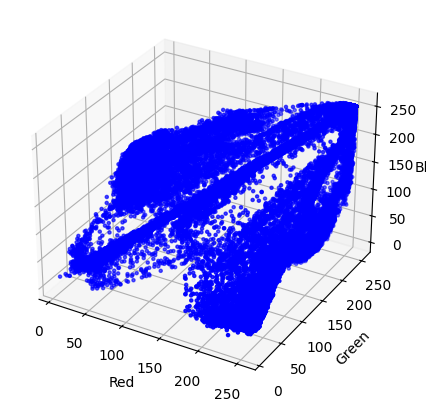

In [3]:
# 2) Plotar imagem 3D do dataset, apresentando a distribuição dos píxeis

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

r = imagem_array[:, :, 0].flatten()
g = imagem_array[:, :, 1].flatten()
b = imagem_array[:, :, 2].flatten()

ax.scatter(r, g, b, c='b', marker='.')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

Número de clusters: 3


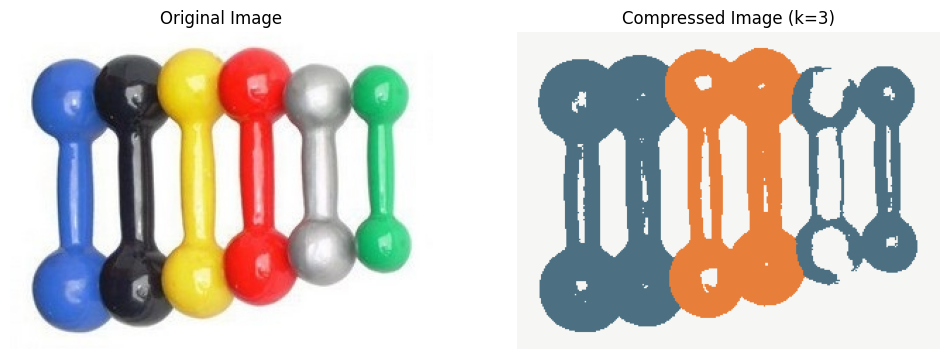

In [4]:
def find_optimal_k(data):
    distortions = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    kn = KneeLocator(range(1, 11), distortions, curve='convex', direction='decreasing')
    return kn.elbow

def cluster_and_show_image(image_path, k_clusters):
    # Load image
    image = Image.open(image_path)
    imagem_array = np.array(image)
    
    # Reshape image array
    data = imagem_array.reshape(-1, 3)
    
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=k_clusters, random_state=42)
    kmeans.fit(data)
    labels = kmeans.predict(data)
    centroids = kmeans.cluster_centers_
    compressed_image = centroids[labels].reshape(imagem_array.shape).astype(np.uint8)
    
    # Display original and compressed images
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    ax[0].imshow(imagem_array)
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    
    ax[1].imshow(compressed_image)
    ax[1].set_title(f'Compressed Image (k={k_clusters})')
    ax[1].axis('off')
    
    plt.show()

# Encontre o número ideal de clusters (k) usando o método de Elbow
imagem_array = np.array(Image.open("halteres.jpg"))
k = find_optimal_k(imagem_array.reshape(-1, 3))
print("Número de clusters:", k)

# kmeans
cluster_and_show_image("halteres.jpg", k)

In [25]:
import numpy as np
import cv2

# Defina as classes
classes = {
    0: "haltere1-Azul",
    1: "haltere2-Preto",
    2: "haltere3-Amarelo",
    3: "haltere4-Vermelho",
    4: "haltere5-Cinza",
    5: "haltere6-Verde",
    6: "fundo"
}

# Função de callback para o evento on_mouse
def on_mouse(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        global pixels, samples
        (B, G, R) = img[y, x]
        p = np.array([[B, G, R, param]])
        pixels = np.concatenate((pixels, p))
        print("Amostra {}: {},{},{}".format(samples, B, G, R))
        samples += 1

# Carregue a imagem
img = cv2.imread("halteres.jpg")
cv2.namedWindow('halteres')
cv2.setMouseCallback("halteres", on_mouse)

# Nome do arquivo para salvar os dados
file = "dataset.csv"
open(file, 'w').close()

qtd_amos = 30

for classe in classes:
    samples = 0
    pixels = np.zeros((1, 4), dtype=np.int8)
    print("Amostras classe {}".format(classes[classe]))
    while True:
        cv2.imshow("halteres", img)
        cv2.waitKey(1)
        if samples >= qtd_amos:
            break
    print("Fim da amostra {}".format(classe))
    pixels = pixels[1:]
    
    csv_rows = (["{},{},{},{}\n".format(classe, j, k, l) for j, k, l, _ in pixels])
    csv_text = "".join(csv_rows)
    with open(file, 'a') as f:
        f.write(csv_text)

print("Fim da coleta de dados")
cv2.destroyAllWindows()

Amostras classe haltere1-Azul
Amostra 0: 191,100,49
Amostra 1: 196,102,59
Amostra 2: 194,104,63
Amostra 3: 230,173,152
Amostra 4: 209,125,100
Amostra 5: 182,96,54
Amostra 6: 238,156,114
Amostra 7: 247,168,141
Amostra 8: 228,144,109
Amostra 9: 218,137,102
Amostra 10: 212,121,84
Amostra 11: 198,101,57
Amostra 12: 216,119,75
Amostra 13: 215,113,70
Amostra 14: 203,101,52
Amostra 15: 191,99,50
Amostra 16: 193,98,49
Amostra 17: 205,100,49
Amostra 18: 219,109,61
Amostra 19: 243,162,129
Amostra 20: 233,125,83
Amostra 21: 214,110,57
Amostra 22: 216,114,61
Amostra 23: 216,114,61
Amostra 24: 216,114,61
Amostra 25: 216,114,61
Amostra 26: 216,114,61
Amostra 27: 216,114,61
Amostra 28: 230,120,72
Amostra 29: 230,120,72
Fim da amostra 0
Amostras classe haltere2-Preto
Amostra 0: 84,74,74
Amostra 1: 84,74,74
Amostra 2: 156,146,146
Amostra 3: 111,106,105
Amostra 4: 155,153,153
Amostra 5: 53,49,54
Amostra 6: 46,43,45
Amostra 7: 81,74,81
Amostra 8: 57,51,56
Amostra 9: 57,53,58
Amostra 10: 54,54,54
Amostra 

   Classe  Blue  Green  Red
0       0   191    100   49
1       0   196    102   59
2       0   194    104   63
3       0   230    173  152
4       0   209    125  100


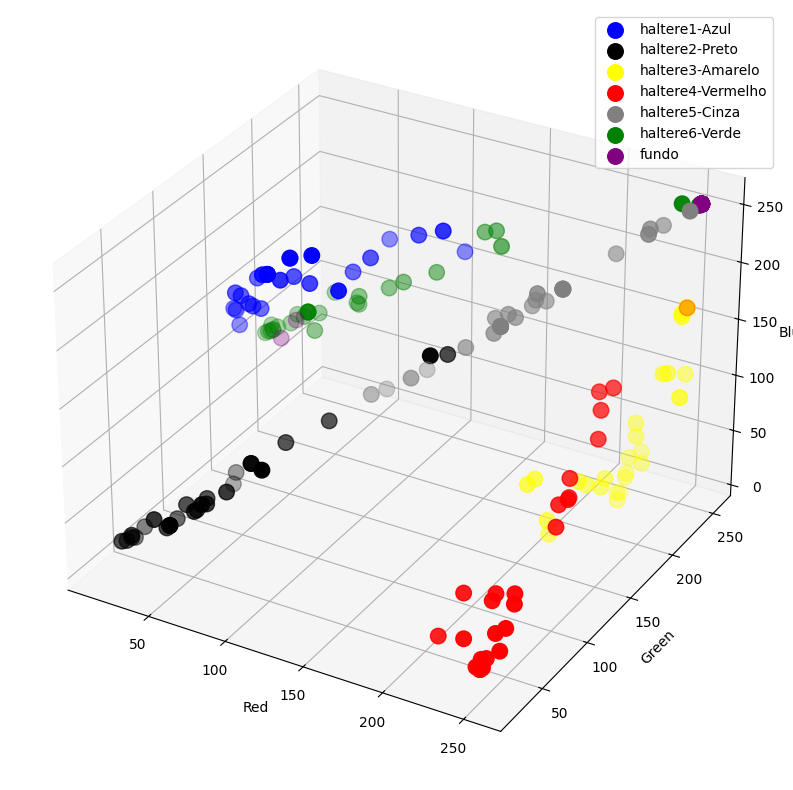

In [40]:
# Carregar os dados do arquivo
df = pd.read_csv('dataset.csv', header=None, names=['Classe', 'Blue', 'Green', 'Red'])
print(df.head())

# Definir classes e cores das classes
classes = {0: "haltere1-Azul", 1: "haltere2-Preto", 2: "haltere3-Amarelo", 3: "haltere4-Vermelho", 4: "haltere5-Cinza", 5: "haltere6-Verde", 6: "fundo"}
cores_classes = {
    0: "blue",
    1: "black",
    2: "yellow",
    3: "red",
    4: "gray",
    5: "green",
    6: "purple"
}

# Plotar a distribuição dos dados
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for classe in classes:
    data = df[df['Classe'] == classe]
    cor = cores_classes[classe]
    ax.scatter(data['Red'], data['Green'], data['Blue'], label=classes[classe], marker='.', s=500, c=cor)
    
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.legend()
plt.show()
